In [4]:
import tensorflow as tf
import numpy as np
import os
import sys
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
import keras
from matplotlib import pyplot as plt

ROOT_DIR = os.path.abspath("../src")
sys.path.append(ROOT_DIR)
import constants
import utils
import data_generator

In [5]:
train_pairs = []
test_pairs = []
with open(os.path.join(constants.DATASET_DIR, 'data_split_action_recognition.txt')) as f:
    cur_split = 'Training'
    lines = f.readlines()
    for l in lines:
        words = l.split()
        if(words[0] == 'Training' or words[0] == 'Test'):
            cur_split = words[0]
        else:
            path = l.split()[0]
            full_path = os.path.join(constants.IMG_DIR, path, 'color')
            len_frame_idx = len([x for x in os.listdir(full_path)
                                if os.path.join(full_path, x)])
            skeleton_path = os.path.join(constants.SKEL_DIR, path, 'skeleton.txt')
            skeleton_vals = np.loadtxt(skeleton_path)
            for i in range(len_frame_idx):
                img_path = os.path.join(constants.IMG_DIR, path, 'color', 'color_%04d.jpeg' %i)
                skel_xyz = skeleton_vals[:, 1:].reshape(skeleton_vals.shape[0], -1)[i]
                data_pair = (img_path, skel_xyz)
                if cur_split == 'Training':
                    train_pairs.append(data_pair)
                else:
                    test_pairs.append(data_pair)

generator = data_generator.DataGenerator(train_pairs)

In [9]:
print(len(generator)*16)

52320


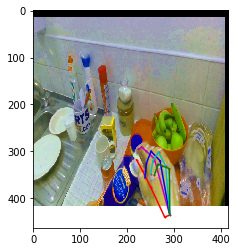

In [4]:
datagen = generator[1]

fig, ax = plt.subplots()
ax.imshow(datagen[0][0])

# skel_proj = utils.xyz2uvd(np.reshape(datagen[1][0][0][:63], (21,3)), camcoord=True)
skel_proj = np.reshape(datagen[1][0][0][:63], (21,3))
utils.visualize_joints_2d(ax, skel_proj[constants.REORDER], joint_idxs=False)

Loading skeleton from /media/aaron/DATADRIVE1/First_Person_Action_Benchmark/Hand_pose_annotation_v1/Subject_1/put_salt/1/skeleton.txt


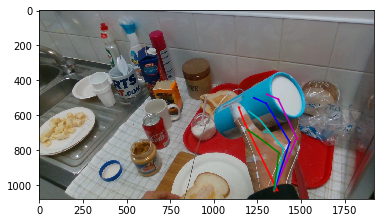

In [5]:
# dataset_dir = '/media/aaron/DATA/ubuntu/fpha-dataset/'
dataset_dir = '/media/aaron/DATADRIVE1/First_Person_Action_Benchmark'
image_dir = os.path.join(dataset_dir, 'Video_files')
annot_dir = os.path.join(dataset_dir, 'Hand_pose_annotation_v1')

img_details = ['Subject_1', 'put_salt', '1']

sample = {
    'subject': img_details[0],
    'action_name': img_details[1],
    'seq_idx': img_details[2],
    'frame_idx': 0,
    'object': None
}

img_color_path = os.path.join(image_dir, 
                   sample['subject'], 
                   sample['action_name'],
                   sample['seq_idx'],
                   'color',
                   'color_%04d.jpeg' %sample['frame_idx'])
img = cv2.imread(img_color_path)[:,:,::-1]

fig, ax = plt.subplots()
ax.imshow(img)

reorder_idx = np.array([
    0, 1, 6, 7, 8, 2, 9, 10, 11, 3, 12, 13, 14, 4, 15, 16, 17, 5, 18, 19,
    20
])

skel_xyz = utils.get_skeleton(sample, annot_dir)[reorder_idx]
skel_uvd = utils.xyz2uvd(skel_xyz)
skel_new_xyz = utils.uvd2xyz(skel_uvd)
utils.visualize_joints_2d(ax, skel_uvd, joint_idxs=False)

In [6]:
skel_xyz = utils.get_skeleton(sample, annot_dir)
skel_camcoord_1 = utils.xyz2camcoord(skel_xyz)
skel_uvd = utils.xyz2uvd(skel_camcoord_1, camcoord=True)

skel_camcoord_2 = utils.uvd2camcoord(skel_uvd)
skel_xyz_2 = utils.uvd2xyz(skel_camcoord_2, camcoord=True)


print(np.allclose(skel_xyz,skel_xyz_2))
print(np.allclose(skel_camcoord_1,skel_camcoord_2))

Loading skeleton from /media/aaron/DATADRIVE1/First_Person_Action_Benchmark/Hand_pose_annotation_v1/Subject_1/put_salt/1/skeleton.txt
True
True
